In [39]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
df=pd.read_csv('employee_data.csv')

In [4]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [5]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

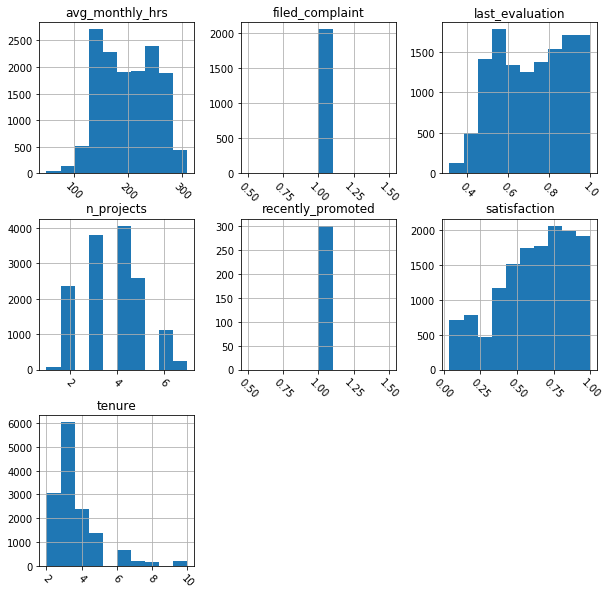

In [6]:
df.hist(figsize=(10,10),xrot=-45)
plt.show()

In [7]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [8]:
df.describe(include=['object'])


,department,salary,status
count,13540,14249,14249
unique,12,3,2
top,sales,low,Employed
freq,3923,6952,10857


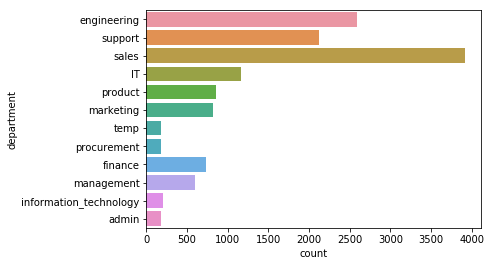

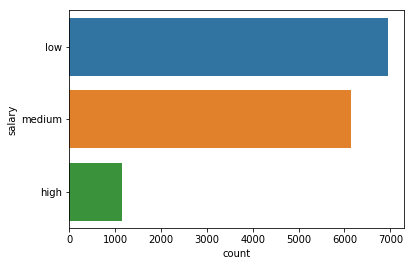

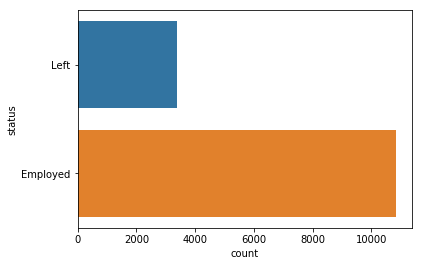

In [9]:
for feature in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(y=feature,data=df)
    plt.show()

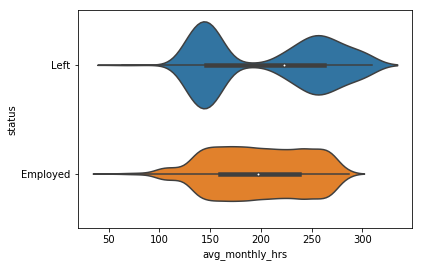

In [10]:
sb.violinplot(y='status',x='avg_monthly_hrs',data=df)

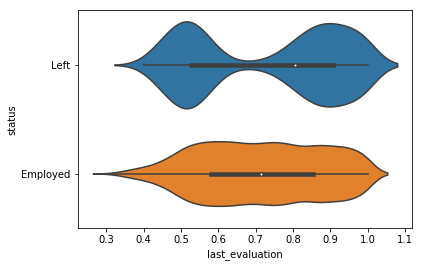

In [11]:
sb.violinplot(y='status',x='last_evaluation',data=df)

In [12]:
df.groupby('status').agg(['mean','std'])

avg_monthly_hrs            filed_complaint      last_evaluation  \
                    mean        std            mean  std            mean   
status                                                                     
Employed      197.700286  46.945468             1.0  0.0        0.714479   
Left          206.502948  61.753651             1.0  0.0        0.730706   

                   n_projects           recently_promoted      satisfaction  \
               std       mean       std              mean  std         mean   
status                                                                        
Employed  0.164110   3.755273  1.009113               1.0  0.0     0.675979   
Left      0.197476   3.833137  1.825760               1.0  0.0     0.447500   

                      tenure            
               std      mean       std  
status                                  
Employed  0.218652  3.380245  1.565510  
Left      0.265484  3.869023  0.973084

In [13]:
df.department.replace('information_technology','IT',inplace=True)
df=df[df.department!='temp']

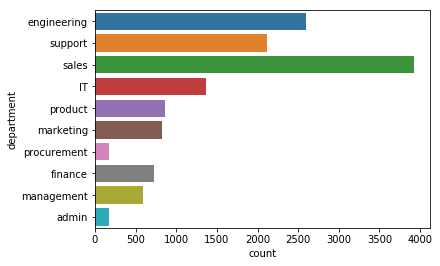

In [14]:
sb.countplot(y='department',data=df)

In [15]:
df.describe(include=['object'])

,department,salary,status
count,13359,14068,14068
unique,10,3,2
top,sales,low,Employed
freq,3923,6871,10701


In [16]:
df.groupby('department').mean().sort_values(by='avg_monthly_hrs')

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
department,,,,,,,
procurement,199.482759,1.0,0.699205,3.885057,1.0,0.627930,3.264368
marketing,199.664225,1.0,0.715018,3.687424,1.0,0.629122,3.567766
product,199.991860,1.0,0.719616,3.817442,NaN,0.628774,3.487209
sales,200.842467,1.0,0.711254,3.772878,1.0,0.623075,3.527148
support,200.975495,1.0,0.723200,3.804430,1.0,0.626923,3.394910
management,201.025210,1.0,0.729714,3.857143,1.0,0.630428,4.294118
finance,201.175824,1.0,0.723880,3.815934,1.0,0.586787,3.543956
admin,201.272727,1.0,0.726282,3.897727,1.0,0.611450,3.369318
IT,202.174453,1.0,0.720017,3.810219,1.0,0.628079,3.456204


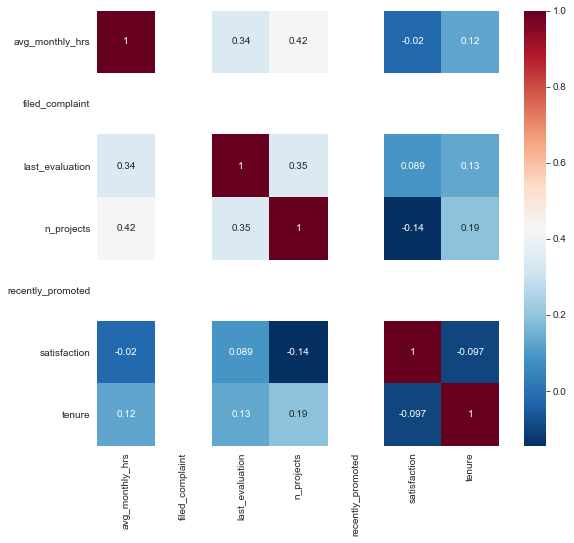

In [17]:
corr=df.corr()
sb.set_style('whitegrid')
plt.figure(figsize=(9,8))
sb.heatmap(corr,annot=True,cmap='RdBu_r')


In [18]:
df.filed_complaint.fillna(0,inplace=True)
df.recently_promoted.fillna(0,inplace=True)

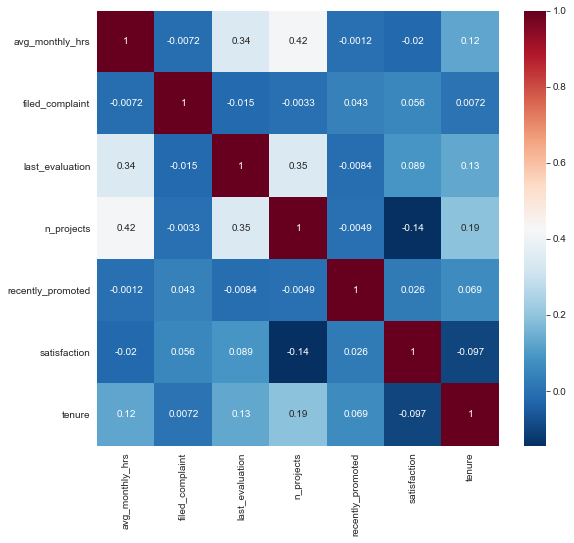

In [19]:
corr=df.corr()
sb.set_style('whitegrid')
plt.figure(figsize=(9,8))
sb.heatmap(corr,annot=True,cmap='RdBu_r')


In [20]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=1

In [21]:
df['salary_numeric']=df.salary.replace({'low':0,'medium':1,'high':2})

In [22]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [23]:
df.shape

(14068, 11)

In [24]:
df=pd.read_csv('employee_data.csv')

In [25]:
df.shape

(14249, 10)

In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(14221, 10)

In [28]:
df=df[df.department!='temp']

In [29]:
df.filed_complaint.fillna(0,inplace=True)
df.recently_promoted.fillna(0,inplace=True)

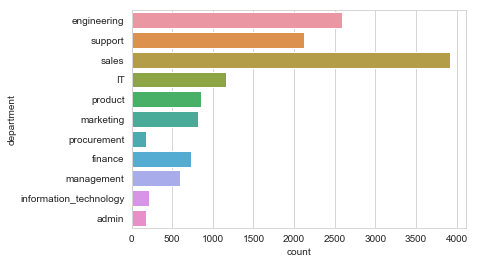

In [30]:
sb.countplot(y='department',data=df)

In [31]:
df.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14068.000000,14068.000000,12717.000000,14068.000000,14068.000000,14068.000000,14068.000000
mean,201.083736,0.143944,0.718477,3.801038,0.021325,0.621295,3.497228
std,49.959962,0.351045,0.173062,1.236058,0.144470,0.250469,1.460917
min,96.000000,0.000000,0.316175,2.000000,0.000000,0.040058,2.000000
25%,156.000000,0.000000,0.563866,3.000000,0.000000,0.450390,3.000000
50%,200.000000,0.000000,0.724939,4.000000,0.000000,0.652527,3.000000
75%,245.000000,0.000000,0.871358,5.000000,0.000000,0.824951,4.000000
max,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000


In [32]:
df.describe(include=['object'])

,department,salary,status
count,13359,14068,14068
unique,11,3,2
top,sales,low,Employed
freq,3923,6871,10701


In [33]:
df.department.fillna('MISSING',inplace=True)

In [34]:
df.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [35]:
df['last_evauation_missing']=df.last_evaluation.isnull().astype(int)
df.last_evaluation.fillna(0,inplace=True)

In [36]:
df.isnull().sum()

avg_monthly_hrs           0
department                0
filed_complaint           0
last_evaluation           0
n_projects                0
recently_promoted         0
salary                    0
satisfaction              0
status                    0
tenure                    0
last_evauation_missing    0
dtype: int64

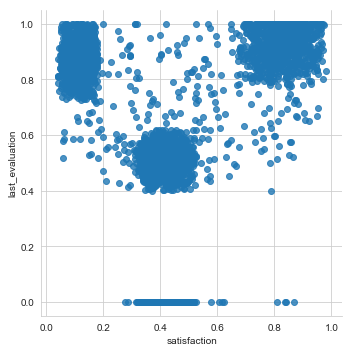

In [37]:
sb.lmplot(x='satisfaction',
          y='last_evaluation',
            data=df[df.status=='Left'],
         fit_reg=False)

In [38]:
df['underperformer']=((df.last_evaluation<0.6)&(df.last_evaluation_missing==0)).astype(int)
df['unhappy']=(df.satisfaction<0.2).astype(int)
df['overachiever']=((df.last_evaluation>0.8)&(df.satisfaction>0.7)).astype(int)

AttributeError: 'DataFrame' object has no attribute 'last_evaluation_missing'

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df['status']=pd.get_dummies(df.status).Left

In [ ]:
df.head()

In [ ]:
df=pd.get_dummies(df,['department','salary'])

In [ ]:
df.shape

In [ ]:
df.

In [ ]:
df.to_csv('analytic_base_table.csv',index=None)

In [ ]:
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression

In [ ]:
df=pd.read_csv('analytic_base_table.csv')

In [ ]:

df.shape


In [ ]:
x=np.linspace(0,1,1000)
np.random.seed(555)
noise=np.random.uniform(-0.02,0.02,1000)
y=((x+noise)>0.97).astype(int)
X=x.reshape(1000,1)

In [ ]:
plt.scatter(X,y)

In [ ]:
pred_dumb=[[0]]*len(y)
plt.scatter(X,y)
plt.plot(X,pred_dumb,'k--')

In [ ]:
clf=LogisticRegression(random_state=123,C=10)
clf.fit(X,y)

In [ ]:
pred_class=clf.predict(X)
pred=clf.predict_proba(X)
pred=[p[1] for p in pred]

In [ ]:
plt.scatter(X,y)
plt.plot(X,pred,'k--')


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,pred_dumb))

accuracy_score(y,pred_class)

In [ ]:
cm=confusion_matrix(y,pred_class)

In [ ]:
tp=cm_v2[1][1]
fp=cm_v2[0][1]
tn=cm_v2[0][0]
fn=cm_v2[1][0]
print(tp/(tp+fn))
print(fp/(fp+tn))

In [ ]:
print(np.round(pred[-10:],2))

In [ ]:
pred_class_v2=(np.array(pred)>0.25).astype(int)

In [ ]:
cm_v2=confusion_matrix(y,pred_class_v2)
cm_v2

In [ ]:
fpr,tpr,threshold=roc_curve(y,pred)

In [ ]:
fpr

In [ ]:
threshold

In [ ]:
pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':threshold})

In [ ]:
fig=plt.figure(figsize=(9,9))

plt.plot(fpr,tpr,label='l1')
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'k--')




In [ ]:
roc_auc_score(y,pred)

In [ ]:
roc_auc_score(y,pred_dumb)